# Challenge
Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. And here is the codebook, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.<br>
Did people become happier from 2012 to 2014? Compute results for each country in the sample.<br>
Who reported watching more TV in 2012, men or women?<br>
Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?<br>
Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?<br>
Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [88]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import sklearn
import matplotlib.pyplot as plt
import scipy.stats as stats

## Data

In [2]:
ess = pd.read_csv('/Users/marenbeckman/Desktop/Data_Science/ESSdata_Thinkful.csv')


In [3]:
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [5]:
ess.shape

(8594, 13)

In [55]:
ess.dropna()
ess.shape

(8594, 13)

In [6]:
ess.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


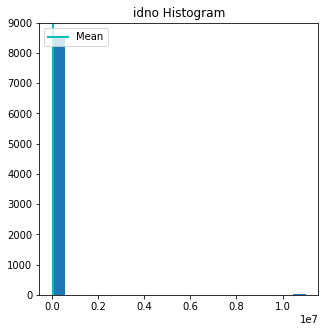

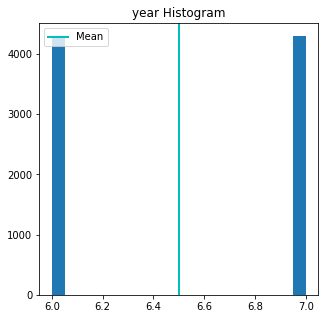

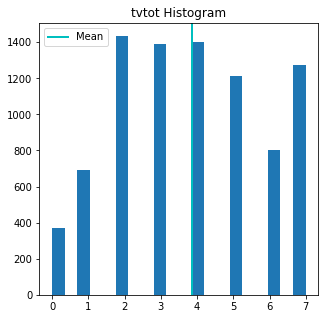

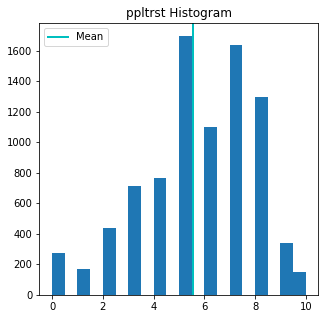

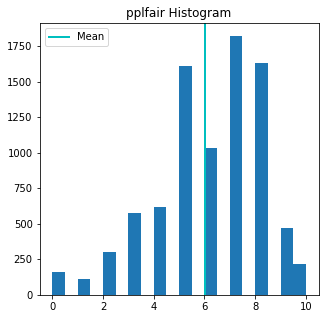

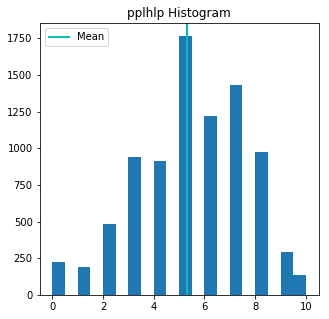

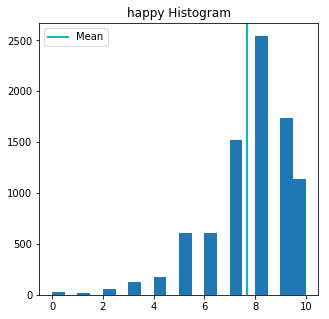

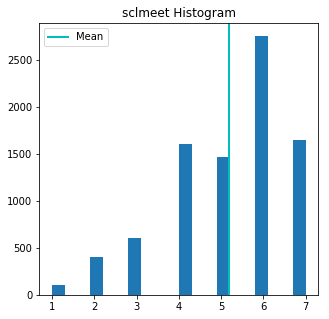

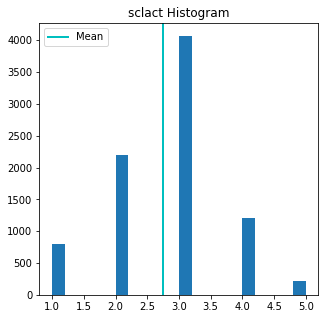

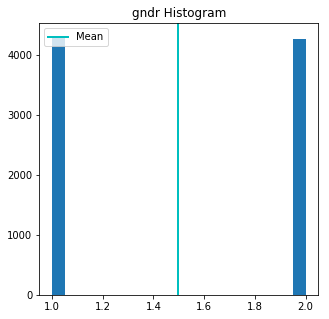

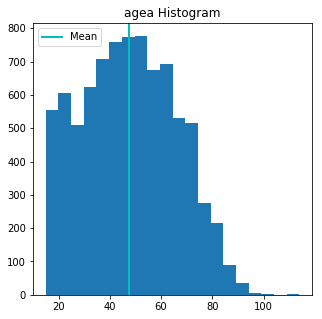

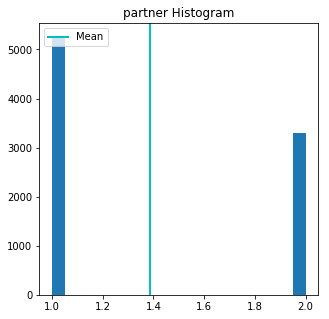

In [26]:
from pandas.api.types import is_numeric_dtype

# Visualize distributions of each column
for column in ess:
    
    if is_numeric_dtype(ess[column]):
    
        plt.figure(figsize=(5, 5))

        plt.hist(ess[column].dropna(how = 'any'), bins=20)
        plt.axvline(ess[column].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
        plt.legend(loc='upper left') 
        plt.title(column + ' Histogram')

        plt.show()


In [7]:
ess.groupby('cntry').describe()

agea                                                         gndr  \
        count       mean        std   min   25%   50%   75%    max   count   
cntry                                                                        
CH     1503.0  46.743180  18.632669  16.0  32.0  46.0  61.0   94.0  1546.0   
CZ     1280.0  46.301563  16.888995  15.0  34.0  46.0  59.0   91.0  1306.0   
DE       28.0  55.892857  16.067771  26.0  49.0  55.5  65.5   89.0    28.0   
ES     2360.0  47.874576  18.200719  16.0  34.0  47.0  61.0  103.0  2426.0   
NO     1436.0  46.536212  18.203938  15.0  32.0  46.0  60.0   94.0  1462.0   
SE     1748.0  49.040046  19.536782  15.0  32.0  50.0  65.0  114.0  1816.0   

                ...  tvtot         year                                     \
           mean ...    75%  max   count mean       std  min  25%  50%  75%   
cntry           ...                                                          
CH     1.513583 ...    4.0  7.0  1546.0  6.5  0.500162  6.0  6.0  6.5  7.0   
CZ     1.525268 ...    7.0  7.0  1316.0  6.5  0.500190  6.0  6.0  6.5  7.0   
DE     1.571429 ...    6.0  7.0    28.0  6.5  0.509175  6.0  6.0  6.5  7.0   
ES     1.504534 ...    6.0  7.0  2426.0  6.5  0.500103  6.0  6.0  6.5  7.0   
NO     1.466484 ...    5.0  7.0  1462.0  6.5  0.500171  6.0  6.0  6.5  7.0   
SE     1.476872 ...    5.0  7.0  1816.0  6.5  0.500138  6.0  6.0  6.5  7.0   

            
       max  
cntry       
CH     7.0  
CZ     7.0  
DE     7.0  
ES     7.0  
NO     7.0  
SE     7.0  

[6 rows x 96 columns]

In [9]:
Switzerland = ess.loc[ess.cntry == 'CH']
Czech = ess.loc[ess.cntry == 'CZ']
Germany = ess.loc[ess.cntry == 'DE']
Spain = ess.loc[ess.cntry == 'ES']
Norway = ess.loc[ess.cntry == 'NO']
Sweden = ess.loc[ess.cntry == 'SE']

## Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [18]:
# break up country data by year
Switzerland2012 = Switzerland.loc[Switzerland.year == 6]
Switzerland2014 = Switzerland.loc[Switzerland.year == 7]

Czech2012 = Czech.loc[Czech.year == 6]
Czech2014 = Czech.loc[Czech.year == 7]

Germany2012 = Germany.loc[Germany.year == 6]
Germany2014 = Germany.loc[Germany.year == 7]

Spain2012 = Spain.loc[Spain.year == 6]
Spain2014 = Spain.loc[Spain.year == 7]

Norway2012 = Norway.loc[Norway.year == 6]
Norway2014 = Norway.loc[Norway.year == 7]

Sweden2012 = Sweden.loc[Sweden.year == 6]
Sweden2014 = Sweden.loc[Sweden.year == 7]

In [40]:
print('Switzerland')
print(stats.ttest_rel(Switzerland2012['ppltrst'],Switzerland2014['ppltrst']))

print('\nCzech Republic')
print(stats.ttest_rel(Czech2012['ppltrst'],Czech2014['ppltrst']))

print('\nGermany')
print(stats.ttest_rel(Germany2012['ppltrst'],Germany2014['ppltrst']))

print('\nSpain')
print(stats.ttest_rel(Spain2012['ppltrst'],Spain2014['ppltrst']))

print('\nNorway')
print(stats.ttest_rel(Norway2012['ppltrst'],Norway2014['ppltrst']))

print('\nSweden')
print(stats.ttest_rel(Sweden2012['ppltrst'],Sweden2014['ppltrst']))

Switzerland
Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)

Czech Republic
Ttest_relResult(statistic=nan, pvalue=nan)

Germany
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)

Spain
Ttest_relResult(statistic=nan, pvalue=nan)

Norway
Ttest_relResult(statistic=nan, pvalue=nan)

Sweden
Ttest_relResult(statistic=nan, pvalue=nan)


In [51]:
# responses per year by country
print('Switzerland')
print(Switzerland2012.shape, Switzerland2014.shape)

print('\nCzech Republic')
print(Czech2012.shape, Czech2014.shape)

print('\nGermany')
print(Germany2012.shape, Germany2014.shape)

print('\nSpain')
print(Spain2012.shape, Spain2014.shape)

print('\nNorway')
print(Norway2012.shape, Norway2014.shape)

print('\nSweden')
print(Sweden2012.shape, Sweden2014.shape)

Switzerland
(773, 13) (773, 13)

Czech Republic
(658, 13) (658, 13)

Germany
(14, 13) (14, 13)

Spain
(1213, 13) (1213, 13)

Norway
(731, 13) (731, 13)

Sweden
(908, 13) (908, 13)


In [112]:
print('Switzerland 2012')
print(Switzerland2012['ppltrst'].mean())
print('\nSwitzerland 2014')
print(Switzerland2014['ppltrst'].mean())

Switzerland 2012
5.677878395860285

Switzerland 2014
5.751617076326003


In [115]:
print('Czech Republic 2012')
print(Czech2012['ppltrst'].mean())
print('\nCzech Republic 2014')
print(Czech2014['ppltrst'].mean())

Czech Republic 2012
4.362519201228879

Czech Republic 2014
4.424657534246576


In [119]:
print('Germany 2012')
print(Germany2012['ppltrst'].mean())
print('\nGermany 2014')
print(Germany2014['ppltrst'].mean())

Germany 2012
5.214285714285714

Germany 2014
5.357142857142857


In [116]:
print('Spain 2012')
print(Spain2012['ppltrst'].mean())
print('\nSpain 2014')
print(Spain2014['ppltrst'].mean())

Spain 2012
5.114591920857379

Spain 2014
4.895127993393889


In [117]:
print('Norway 2012')
print(Norway2012['ppltrst'].mean())
print('\nNorway 2014')
print(Norway2014['ppltrst'].mean())

Norway 2012
6.64931506849315

Norway 2014
6.598630136986301


In [118]:
print('Sweden 2012')
print(Sweden2012['ppltrst'].mean())
print('\nSweden 2014')
print(Sweden2014['ppltrst'].mean())

Sweden 2012
6.058498896247241

Sweden 2014
6.257709251101321


I broke down the data by country and year, initially attempting to run t-tests comparing the two years for each country.  This proved challenging as all but Switzerland and Germany produced 'nan' results.  From there, I computed the mean of the trust category of each year by country.  This shows that each country showed an increase in average trust rating except Spain and Norway.

## Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [60]:
print('Switzerland')
print(stats.ttest_rel(Switzerland2012['happy'],Switzerland2014['happy']))

print('\nCzech Republic')
print(stats.ttest_rel(Czech2012['happy'],Czech2014['happy']))

print('\nGermany')
print(stats.ttest_rel(Germany2012['happy'],Germany2014['happy']))

print('\nSpain')
print(stats.ttest_rel(Spain2012['happy'],Spain2014['happy']))

print('\nNorway')
print(stats.ttest_rel(Norway2012['happy'],Norway2014['happy']))

print('\nSweden')
print(stats.ttest_rel(Sweden2012['happy'],Sweden2014['happy']))

Switzerland
Ttest_relResult(statistic=nan, pvalue=nan)

Czech Republic
Ttest_relResult(statistic=nan, pvalue=nan)

Germany
Ttest_relResult(statistic=-0.8062257748298549, pvalue=0.4346138707734991)

Spain
Ttest_relResult(statistic=nan, pvalue=nan)

Norway
Ttest_relResult(statistic=nan, pvalue=nan)

Sweden
Ttest_relResult(statistic=nan, pvalue=nan)


In [61]:
Switzerland2012['happy'].value_counts()

8.0     272
9.0     183
10.0    119
7.0     115
6.0      36
5.0      31
3.0       6
4.0       4
2.0       2
1.0       1
0.0       1
Name: happy, dtype: int64

In [62]:
Switzerland2014['happy'].value_counts()

8.0     254
9.0     210
10.0    114
7.0     109
6.0      43
5.0      29
4.0       8
3.0       4
2.0       1
0.0       1
Name: happy, dtype: int64

In [128]:
# creat new dataframe of change by respondent
Swi2012Happy = pd.DataFrame()
Swi2012Happy['idno'] = Switzerland2012['idno']
Swi2012Happy['happy2012'] = Switzerland2012['happy']

Swi2014Happy = pd.DataFrame()
Swi2014Happy['idno'] = Switzerland2014['idno']
Swi2014Happy['happy2014'] = Switzerland2014['happy']

In [130]:
SwitzerlandHappy = pd.merge(left=Swi2012Happy,right=Swi2014Happy, left_on='idno', right_on='idno')
SwitzerlandHappy.head()

,idno,happy2012,happy2014
0,5.0,8.0,9.0
1,25.0,9.0,6.0
2,26.0,7.0,8.0
3,28.0,10.0,9.0
4,29.0,8.0,8.0


In [132]:
SwitzerlandHappy['change'] = SwitzerlandHappy['happy2014'] - SwitzerlandHappy['happy2012']

In [134]:
SwitzerlandHappy.describe()

,idno,happy2012,happy2014,change
count,773.000000,770.000000,773.000000,770.000000
mean,1480.680466,8.088312,8.116429,0.023377
std,837.085069,1.437920,1.405725,2.030835
min,5.000000,0.000000,0.000000,-8.000000
25%,761.000000,7.000000,7.000000,-1.000000
50%,1432.000000,8.000000,8.000000,0.000000
75%,2243.000000,9.000000,9.000000,1.000000
max,2905.000000,10.000000,10.000000,10.000000


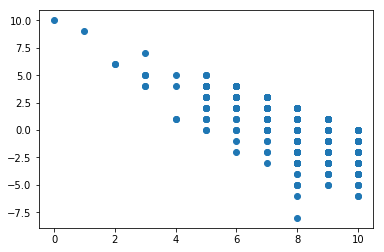

In [135]:
plt.scatter(SwitzerlandHappy['happy2012'], SwitzerlandHappy['change'])

In [146]:
print('Switzerland')
SwitzerlandHappy['change'].describe()

Switzerland


count    770.000000
mean       0.023377
std        2.030835
min       -8.000000
25%       -1.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: change, dtype: float64

In [144]:
# creat new dataframe of change by respondent
Czech2012Happy = pd.DataFrame()
Czech2012Happy['idno'] = Czech2012['idno']
Czech2012Happy['happy2012'] = Czech2012['happy']

Czech2014Happy = pd.DataFrame()
Czech2014Happy['idno'] = Czech2014['idno']
Czech2014Happy['happy2014'] = Czech2014['happy']

CzechHappy = pd.merge(left=Czech2012Happy,right=Czech2014Happy, left_on='idno', right_on='idno')

CzechHappy['change'] = CzechHappy['happy2014'] - CzechHappy['happy2012']

print('Czech Republic')
CzechHappy['change'].describe()

Czech Republic


count    640.000000
mean       0.162500
std        2.823194
min       -9.000000
25%       -2.000000
50%        0.000000
75%        2.000000
max       10.000000
Name: change, dtype: float64

In [143]:
# creat new dataframe of change by respondent
Germany2012Happy = pd.DataFrame()
Germany2012Happy['idno'] = Germany2012['idno']
Germany2012Happy['happy2012'] = Germany2012['happy']

Germany2014Happy = pd.DataFrame()
Germany2014Happy['idno'] = Germany2014['idno']
Germany2014Happy['happy2014'] = Germany2014['happy']

GermanyHappy = pd.merge(left=Germany2012Happy,right=Germany2014Happy, left_on='idno', right_on='idno')

GermanyHappy['change'] = GermanyHappy['happy2014'] - GermanyHappy['happy2012']

print('Germany')
GermanyHappy['change'].describe()

Germany


count    14.000000
mean      0.428571
std       1.988981
min      -3.000000
25%      -1.000000
50%       0.000000
75%       2.000000
max       4.000000
Name: change, dtype: float64

In [147]:
# creat new dataframe of change by respondent
Spain2012Happy = pd.DataFrame()
Spain2012Happy['idno'] = Spain2012['idno']
Spain2012Happy['happy2012'] = Spain2012['happy']

Spain2014Happy = pd.DataFrame()
Spain2014Happy['idno'] = Spain2014['idno']
Spain2014Happy['happy2014'] = Spain2014['happy']

SpainHappy = pd.merge(left=Spain2012Happy,right=Spain2014Happy, left_on='idno', right_on='idno')

SpainHappy['change'] = SpainHappy['happy2014'] - SpainHappy['happy2012']

print('Spain')
SpainHappy['change'].describe()

Spain


count    1211.000000
mean       -0.127168
std         2.742144
min        -9.000000
25%        -2.000000
50%         0.000000
75%         1.000000
max         9.000000
Name: change, dtype: float64

## Who reported watching more TV in 2012, men or women?

In [63]:
year2012 = ess.loc[ess.year == 6]

In [65]:
women2012 = year2012.loc[year2012.gndr == 2]
men2012 = year2012.loc[year2012.gndr == 1]

In [66]:
stats.ttest_ind(women2012['tvtot'], men2012['tvtot'])

Ttest_indResult(statistic=nan, pvalue=nan)

## Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [67]:
partner2012 = year2012.loc[year2012.partner == 1]
alone2012 = year2012.loc[year2012.partner == 2]

In [80]:
partner_fair = partner2012['pplfair'][partner2012['pplfair'] > 5].count() / partner2012['pplfair'].count()
print('Percentage of people living with partner who believe people are mostly fair: ', partner_fair)

Percentage of people living with partner who believe people are mostly fair:  0.6271122793841533


In [81]:
alone_fair = alone2012['pplfair'][alone2012['pplfair'] > 5].count() / alone2012['pplfair'].count()
print('Percentage of people living with partner who believe people are mostly fair: ', alone_fair)

Percentage of people living with partner who believe people are mostly fair:  0.5677860696517413


People living with a partner were more likely (by eight points) to view people as mostly fair in 2012 than those living alone.

## Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [82]:
print('Switzerland')
print(Switzerland2014['sclmeet'].describe())

print('\nCzech Republic')
print(Czech2014['sclmeet'].describe())

print('\nSpain')
print(Spain2014['sclmeet'].describe())

print('\nNorway')
print(Norway2014['sclmeet'].describe())

Switzerland
count    772.000000
mean       5.160622
std        1.308499
min        1.000000
25%        4.000000
50%        6.000000
75%        6.000000
max        7.000000
Name: sclmeet, dtype: float64

Czech Republic
count    655.000000
mean       4.445802
std        1.481706
min        1.000000
25%        4.000000
50%        4.000000
75%        6.000000
max        7.000000
Name: sclmeet, dtype: float64

Spain
count    1211.000000
mean        5.260116
std         1.467855
min         1.000000
25%         4.000000
50%         6.000000
75%         6.000000
max         7.000000
Name: sclmeet, dtype: float64

Norway
count    731.000000
mean       5.302326
std        1.347848
min        1.000000
25%        4.000000
50%        6.000000
75%        6.000000
max        7.000000
Name: sclmeet, dtype: float64


In [84]:
print('Switzerland and Czech Republic')
print(stats.ttest_ind(Switzerland2014['sclmeet'], Czech2014['sclmeet']))

print('\nSpain and Czech Republic')
print(stats.ttest_ind(Spain2012['sclmeet'], Czech2014['sclmeet']))

print('\nNorway and Czech Republic')
print(stats.ttest_ind(Norway2014['sclmeet'], Czech2014['sclmeet']))

Switzerland and Czech Republic
Ttest_indResult(statistic=nan, pvalue=nan)

Spain and Czech Republic
Ttest_indResult(statistic=nan, pvalue=nan)

Norway and Czech Republic
Ttest_indResult(statistic=nan, pvalue=nan)


People in the Czech Republic were generally less likely to meet people socially in 2014 compared to people in Switzerland, Spain or Norway.

## Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

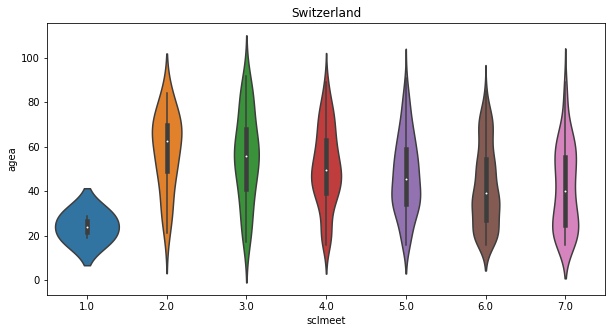

In [91]:
plt.figure(figsize=(10, 5))
sns.violinplot(Switzerland2014['sclmeet'], Switzerland2014['agea'])
plt.title('Switzerland')
plt.show()

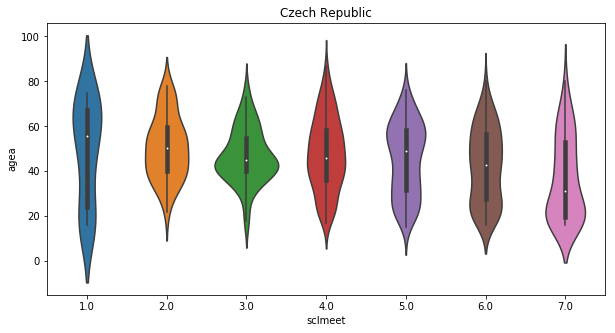

In [92]:
plt.figure(figsize=(10, 5))
sns.violinplot(Czech2014['sclmeet'], Czech2014['agea'])
plt.title('Czech Republic')
plt.show()

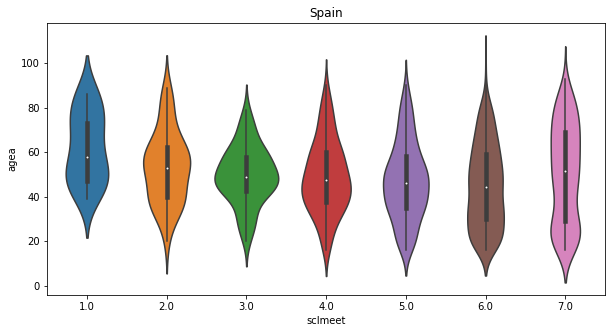

In [93]:
plt.figure(figsize=(10, 5))
sns.violinplot(Spain2014['sclmeet'], Spain2014['agea'])
plt.title('Spain')
plt.show()

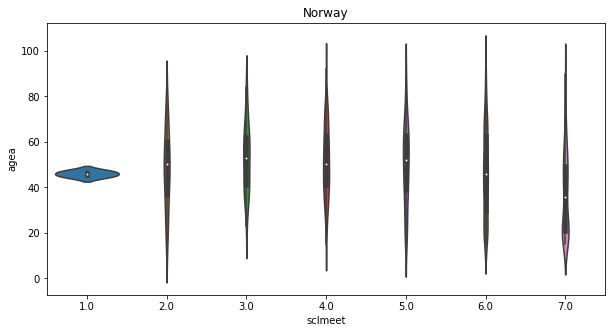

In [96]:
plt.figure(figsize=(10, 5))
sns.violinplot(Norway2014['sclmeet'], Norway2014['agea'])
plt.title('Norway')
plt.show()

In [107]:
Switzerland2014[['sclmeet', 'agea']].groupby(['agea']).mean()

,sclmeet
agea,
16.0,5.818182
17.0,5.928571
18.0,5.636364
19.0,5.076923
20.0,5.785714
21.0,5.111111
22.0,6.300000
23.0,5.857143
24.0,5.000000


In [108]:
a = Switzerland2014[['sclmeet', 'agea']].groupby(['agea']).mean()
b = Czech2014[['sclmeet', 'agea']].groupby(['agea']).mean()
c = Spain2014[['sclmeet', 'agea']].groupby(['agea']).mean()
d = Norway2014[['sclmeet', 'agea']].groupby(['agea']).mean()

In [109]:
print('Switzerland and Czech Republic')
print(stats.ttest_ind(a, b))

print('\nSpain and Czech Republic')
print(stats.ttest_ind(c, b))

print('\nNorway and Czech Republic')
print(stats.ttest_ind(d, b))

Switzerland and Czech Republic
Ttest_indResult(statistic=array([5.44675867]), pvalue=array([2.28367952e-07]))

Spain and Czech Republic
Ttest_indResult(statistic=array([8.80437429]), pvalue=array([4.67921037e-15]))

Norway and Czech Republic
Ttest_indResult(statistic=array([8.39915321]), pvalue=array([4.18787683e-14]))
